<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Gestures_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##[MPII Human Pose Dataset](http://human-pose.mpi-inf.mpg.de/#dataset)




MPII Output Format: Head — 0, Neck — 1, Right Shoulder — 2, Right Elbow — 3, Right Wrist — 4, Left Shoulder — 5, Left Elbow — 6, Left Wrist — 7, Right Hip — 8, Right Knee — 9, Right Ankle — 10, Left Hip — 11, Left Knee — 12, Left Ankle — 13, Chest — 14, Background — 15

In [26]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [107]:
img = cv2.imread('4.jpg')

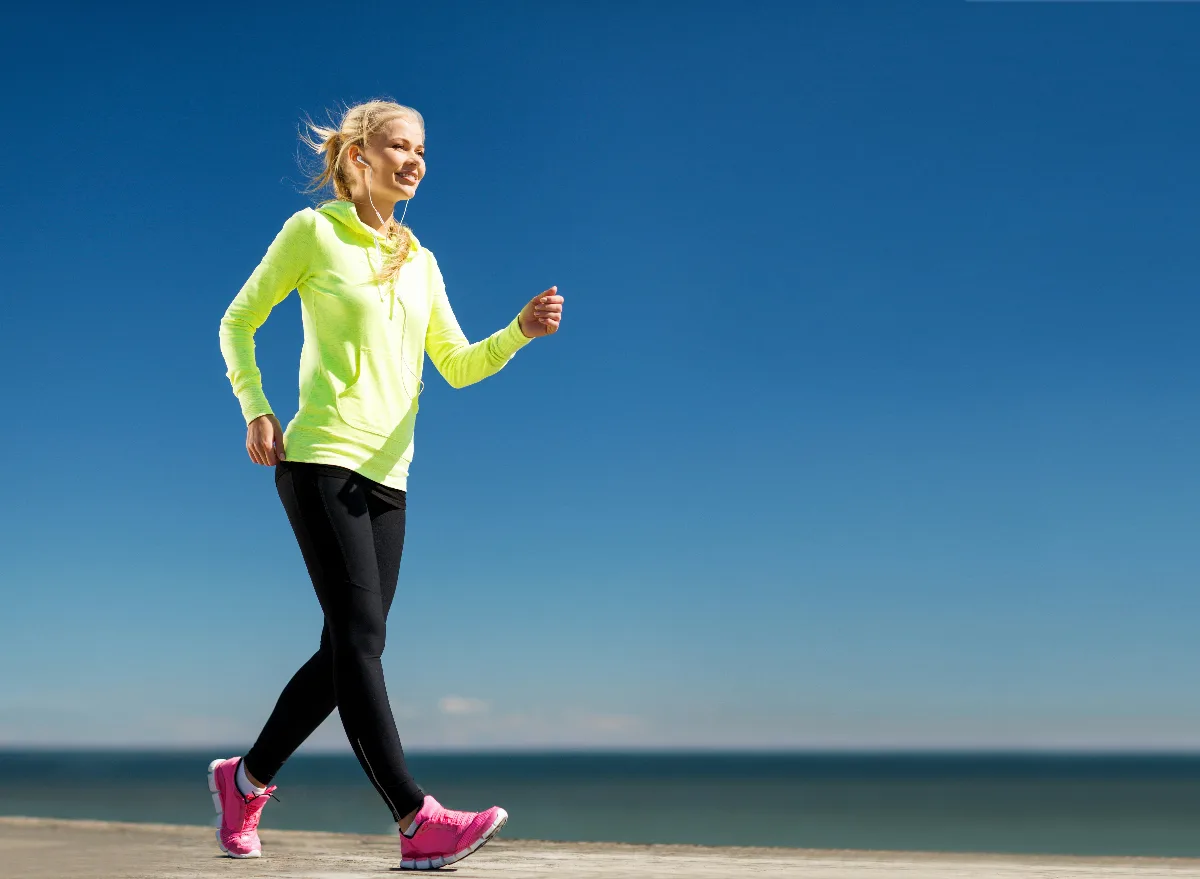

In [108]:
cv2_imshow(img)

In [103]:
img_blob = cv2.dnn.blobFromImage(image=img,
                                 scalefactor= 1/255,
                                 size=(img.shape[1], img.shape[0]))

##Load the pre-trained neural network

In [57]:
!wget https://raw.githubusercontent.com/CMU-Perceptual-Computing-Lab/openpose/master/models/pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt

--2023-01-31 16:27:38--  https://raw.githubusercontent.com/CMU-Perceptual-Computing-Lab/openpose/master/models/pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32217 (31K) [text/plain]
Saving to: ‘pose_deploy_linevec_faster_4_stages.prototxt.1’

pose_deploy_linevec 100%[===================>]  31.46K  --.-KB/s    in 0s      

2023-01-31 16:27:38 (162 MB/s) - ‘pose_deploy_linevec_faster_4_stages.prototxt.1’ saved [32217/32217]



In [119]:
!wget http://posefs1.perception.cs.cmu.edu/Users/tsimon/Projects/coco/data/models/mpi/pose_iter_160000.caffemodel

--2023-01-31 18:22:23--  http://posefs1.perception.cs.cmu.edu/Users/tsimon/Projects/coco/data/models/mpi/pose_iter_160000.caffemodel
Resolving posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)... 128.2.220.57
Connecting to posefs1.perception.cs.cmu.edu (posefs1.perception.cs.cmu.edu)|128.2.220.57|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205950363 (196M) [text/plain]
Saving to: ‘pose_iter_160000.caffemodel.1’

pose_iter_160000.ca 100%[===================>] 196.41M  61.7MB/s    in 3.2s    

2023-01-31 18:22:27 (61.7 MB/s) - ‘pose_iter_160000.caffemodel.1’ saved [205950363/205950363]



In [120]:
network = cv2.dnn.readNetFromCaffe('pose_deploy_linevec_faster_4_stages.prototxt','/content/pose_iter_160000.caffemodel')

In [121]:
network.getLayerNames()

('conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'pool1_stage1',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'pool2_stage1',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_4',
 'relu3_4',
 'pool3_stage1',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3_CPM',
 'relu4_3_CPM',
 'conv4_4_CPM',
 'relu4_4_CPM',
 'conv5_1_CPM_L1',
 'relu5_1_CPM_L1',
 'conv5_1_CPM_L2',
 'relu5_1_CPM_L2',
 'conv5_2_CPM_L1',
 'relu5_2_CPM_L1',
 'conv5_2_CPM_L2',
 'relu5_2_CPM_L2',
 'conv5_3_CPM_L1',
 'relu5_3_CPM_L1',
 'conv5_3_CPM_L2',
 'relu5_3_CPM_L2',
 'conv5_4_CPM_L1',
 'relu5_4_CPM_L1',
 'conv5_4_CPM_L2',
 'relu5_4_CPM_L2',
 'conv5_5_CPM_L1',
 'conv5_5_CPM_L2',
 'concat_stage2',
 'Mconv1_stage2_L1',
 'Mrelu1_stage2_L1',
 'Mconv1_stage2_L2',
 'Mrelu1_stage2_L2',
 'Mconv2_stage2_L1',
 'Mrelu2_stage2_L1',
 'Mconv2_stage2_L2',
 'Mrelu2_stage2_L2',
 'Mconv3_stage2_L1',
 'Mrelu3_stage2_L1',
 'Mconv3_stage2_L2',
 'Mrelu3_stage2_L2',
 'Mconv4_stage2_L1',
 'Mrelu4_sta

In [122]:
network.setInput(img_blob)
output = network.forward()

In [123]:
output.shape
# BachSize, confidence, pos_x, pos_y

(1, 44, 110, 150)

In [124]:
position_width = output.shape[3]
position_height = output.shape[2]

In [127]:
points_count=15
points = []
img = cv2.imread('4.jpg')
for u in range(points_count):
  confidence_map = output[0, u, :, :]

  minValue, maxValue, minPosition, MaxPosition = cv2.minMaxLoc(confidence_map)
  
  point = MaxPosition
  confidence = maxValue
  print(confidence, point)
  
  #Scale the position to the image
  x = int((img.shape[1] * point[0])/ position_width)
  y = int((img.shape[0] * point[1])/ position_height)
  # print(x, y)
  # print(confidence > 0.5, confidence)
  if confidence > 0.1:
    cv2.circle(img, (x,y), 5, (0, 255, 0), thickness=-1)
    cv2.putText(img, f'{u}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255))
    points.append((x, y))
  else:
    points.append(None)

0.21017543971538544 (70, 37)
0.3088262379169464 (65, 41)
0.3129640519618988 (52, 32)
0.1305609494447708 (52, 18)
0.17749707400798798 (66, 40)
0.3136554956436157 (38, 27)
0.36235740780830383 (29, 41)
0.2091057449579239 (30, 50)
0.2468094378709793 (56, 45)
0.1711100935935974 (32, 52)
0.07756731659173965 (66, 40)
0.21695637702941895 (55, 45)
0.0821799635887146 (50, 89)
0.05742134153842926 (67, 39)
0.27713924646377563 (44, 42)


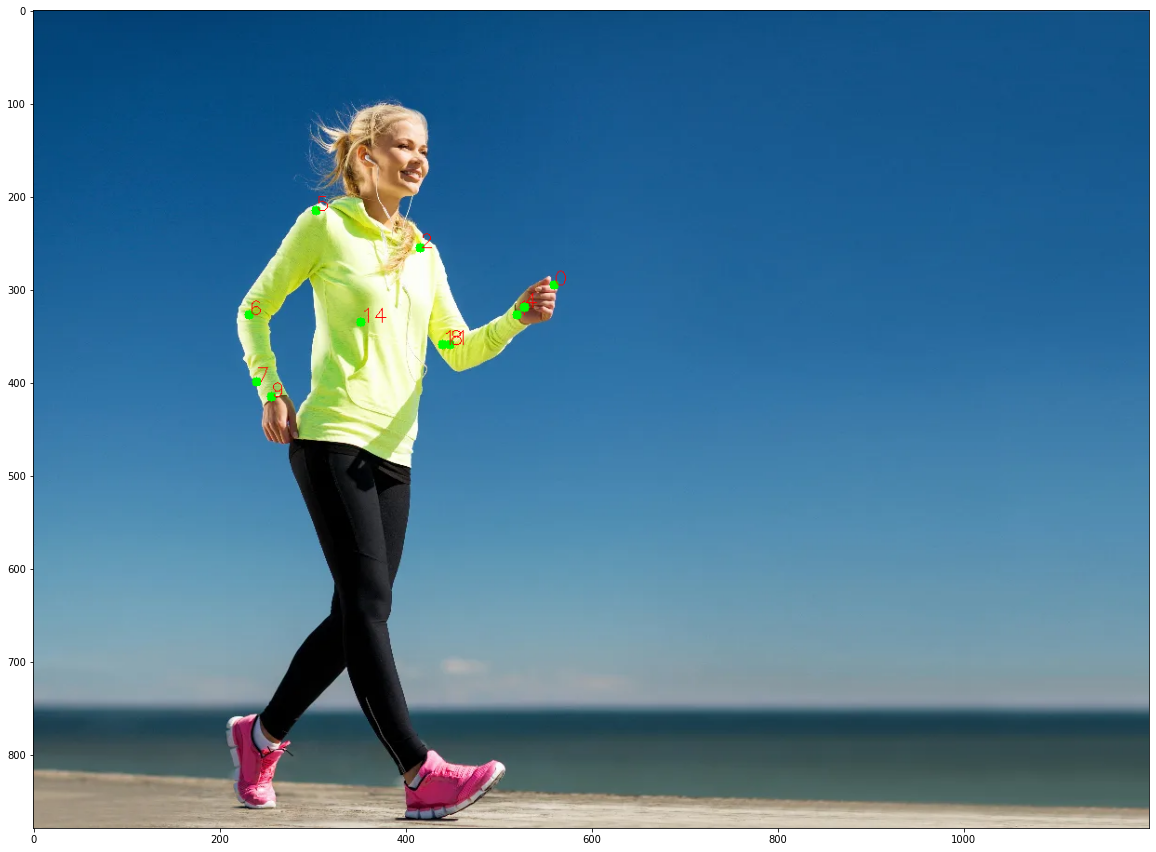

In [126]:
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [116]:
point_connection = [[1, 5], [5, 6], [6, 2], [2, 0], [1, 3]]

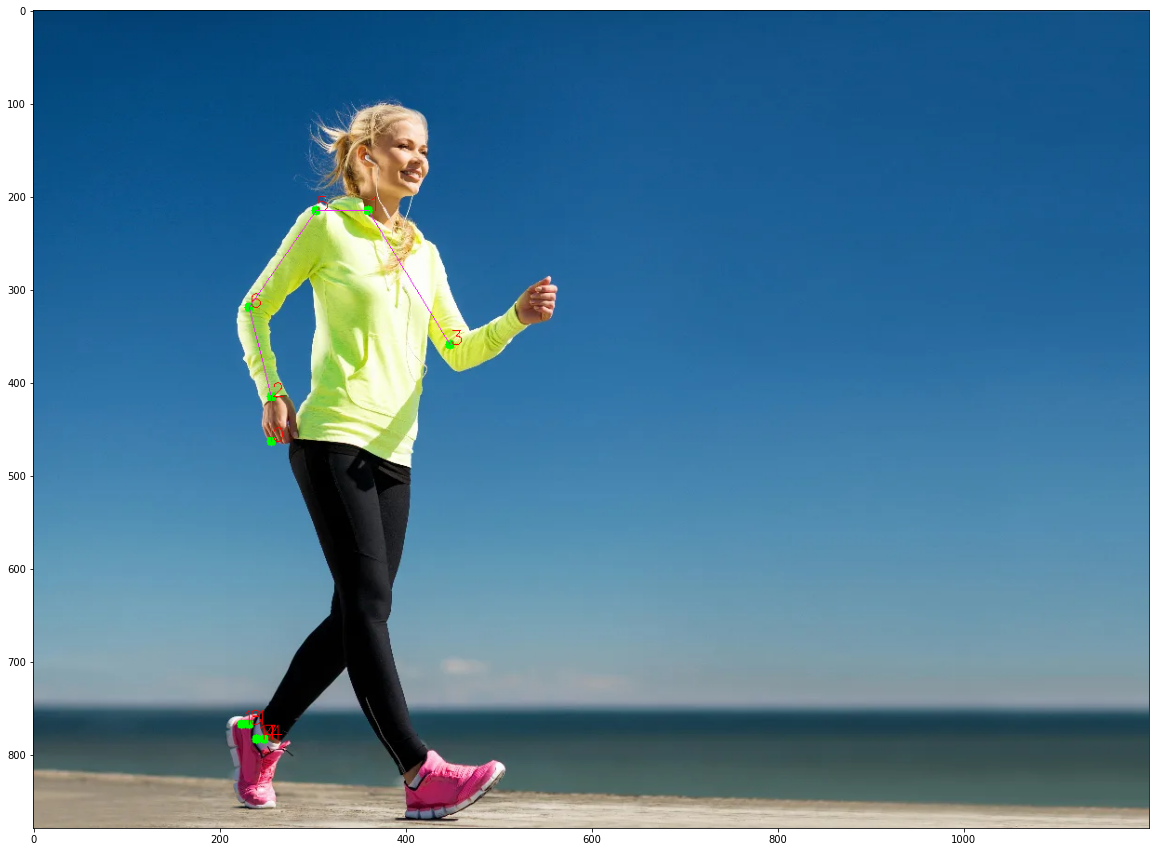

In [118]:
for connection in point_connection:
  partA = connection[0]
  partB = connection[1]

  if points[partA] and points[partB]:
    cv2.line(img, points[partA], points[partB], (243, 34,233))

plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))